In [ ]:
from train_eval import train, evaluate
from model import get_model
from data_utils import get_cifar100_loaders
import torch.nn as nn
import torch.optim as optim
import torch
train_loader, test_loader = get_cifar100_loaders(batch_size=128)
model = get_model('vgg11_bn', pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses, train_top1, train_top5 = train(model, train_loader, optimizer, criterion, epochs=20)
evaluate(model, test_loader, criterion)

torch.save(model.state_dict(), "vgg11_bn_finetuned.pth")
print("Model saved as vgg11_bn_finetuned.pth")


Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


Epoch [1/20] | Loss: 4.3205 | Top-1: 3.16% | Top-5: 13.64%
Epoch [2/20] | Loss: 3.8478 | Top-1: 7.69% | Top-5: 28.22%
Epoch [3/20] | Loss: 3.5628 | Top-1: 11.71% | Top-5: 37.96%
Epoch [4/20] | Loss: 3.3178 | Top-1: 15.64% | Top-5: 45.39%
Epoch [5/20] | Loss: 3.1338 | Top-1: 19.32% | Top-5: 50.71%
Epoch [6/20] | Loss: 2.9732 | Top-1: 22.72% | Top-5: 55.45%
Epoch [7/20] | Loss: 2.8269 | Top-1: 26.16% | Top-5: 59.16%
Epoch [8/20] | Loss: 2.7084 | Top-1: 28.55% | Top-5: 62.13%
Epoch [9/20] | Loss: 2.5893 | Top-1: 31.15% | Top-5: 65.08%
Epoch [10/20] | Loss: 2.4986 | Top-1: 33.35% | Top-5: 67.00%
Epoch [11/20] | Loss: 2.4079 | Top-1: 35.60% | Top-5: 69.12%
Epoch [12/20] | Loss: 2.3178 | Top-1: 37.25% | Top-5: 71.12%
Epoch [13/20] | Loss: 2.2403 | Top-1: 39.40% | Top-5: 72.58%
Epoch [14/20] | Loss: 2.1624 | Top-1: 40.99% | Top-5: 74.37%
Epoch [15/20] | Loss: 2.0949 | Top-1: 42.66% | Top-5: 75.74%
Epoch [16/20] | Loss: 2.0246 | Top-1: 44.57% | Top-5: 76.95%
Epoch [17/20] | Loss: 1.9707 | Top-

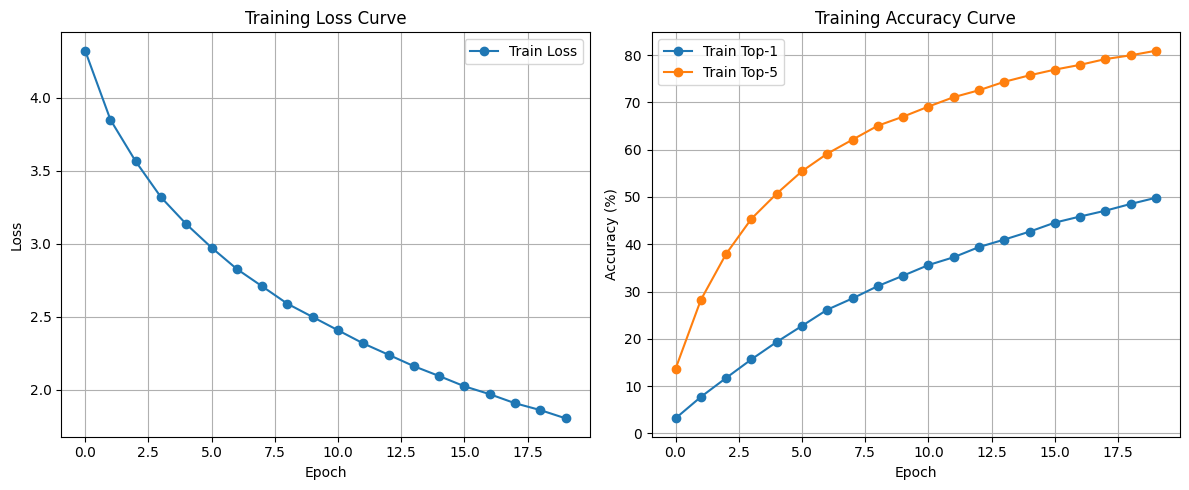

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_top1, label='Train Top-1', marker='o')
plt.plot(train_top5, label='Train Top-5', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
from data_utils import get_cifar100_loaders
from model import get_model
from train_eval import evaluate
from train_kd import train_kd, KDLoss
import torch
import torch.nn as nn
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader, test_loader = get_cifar100_loaders(batch_size=128, num_workers=2)

teacher = get_model('vgg16_bn', pretrained=True, num_classes=100)
student = get_model('vgg11_bn', pretrained=False, num_classes=100)

teacher.to(device)
student.to(device)

ce_criterion = nn.CrossEntropyLoss()
kd_criterion = KDLoss(ce_criterion, alpha=0.6, T=3.0)
optimizer = optim.Adam(student.parameters(), lr=1e-4)

student, epoch_losses, epoch_ce, epoch_kd, epoch_top1, epoch_top5 = train_kd(student=student,
                   teacher=teacher,
                   train_loader=train_loader,
                   optimizer=optimizer,
                   kd_criterion=kd_criterion,
                   epochs=20,
                   device=device,
                   save_path='student_kd_final.pth',
                   log_every=20)

avg_loss, top1, top5 = evaluate(student, test_loader, ce_criterion, device=device)
print(f"Test -> Loss: {avg_loss:.4f}, Top1: {top1:.2f}%, Top5: {top5:.2f}%")

torch.save(student.state_dict(), "distilled_student.pth")
print("Distilled Student Saved")


Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master
Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


Epoch 1 Batch 20/391 | Loss 16.1684 (CE 4.6040, KD 23.8780) | Top1 0.74% Top5 4.96%
Epoch 1 Batch 40/391 | Loss 16.2239 (CE 4.6013, KD 23.9724) | Top1 1.07% Top5 5.70%
Epoch 1 Batch 60/391 | Loss 16.1870 (CE 4.5919, KD 23.9171) | Top1 1.24% Top5 6.37%
Epoch 1 Batch 80/391 | Loss 16.1514 (CE 4.5777, KD 23.8672) | Top1 1.37% Top5 6.69%
Epoch 1 Batch 100/391 | Loss 16.1105 (CE 4.5690, KD 23.8049) | Top1 1.44% Top5 7.05%
Epoch 1 Batch 120/391 | Loss 16.0337 (CE 4.5542, KD 23.6866) | Top1 1.53% Top5 7.63%
Epoch 1 Batch 140/391 | Loss 15.9834 (CE 4.5409, KD 23.6118) | Top1 1.67% Top5 7.97%
Epoch 1 Batch 160/391 | Loss 15.9166 (CE 4.5244, KD 23.5114) | Top1 1.77% Top5 8.31%
Epoch 1 Batch 180/391 | Loss 15.8464 (CE 4.5083, KD 23.4052) | Top1 1.91% Top5 8.76%
Epoch 1 Batch 200/391 | Loss 15.7692 (CE 4.4919, KD 23.2874) | Top1 1.99% Top5 9.15%
Epoch 1 Batch 220/391 | Loss 15.6975 (CE 4.4764, KD 23.1783) | Top1 2.08% Top5 9.59%
Epoch 1 Batch 240/391 | Loss 15.6284 (CE 4.4610, KD 23.0734) | Top1 2

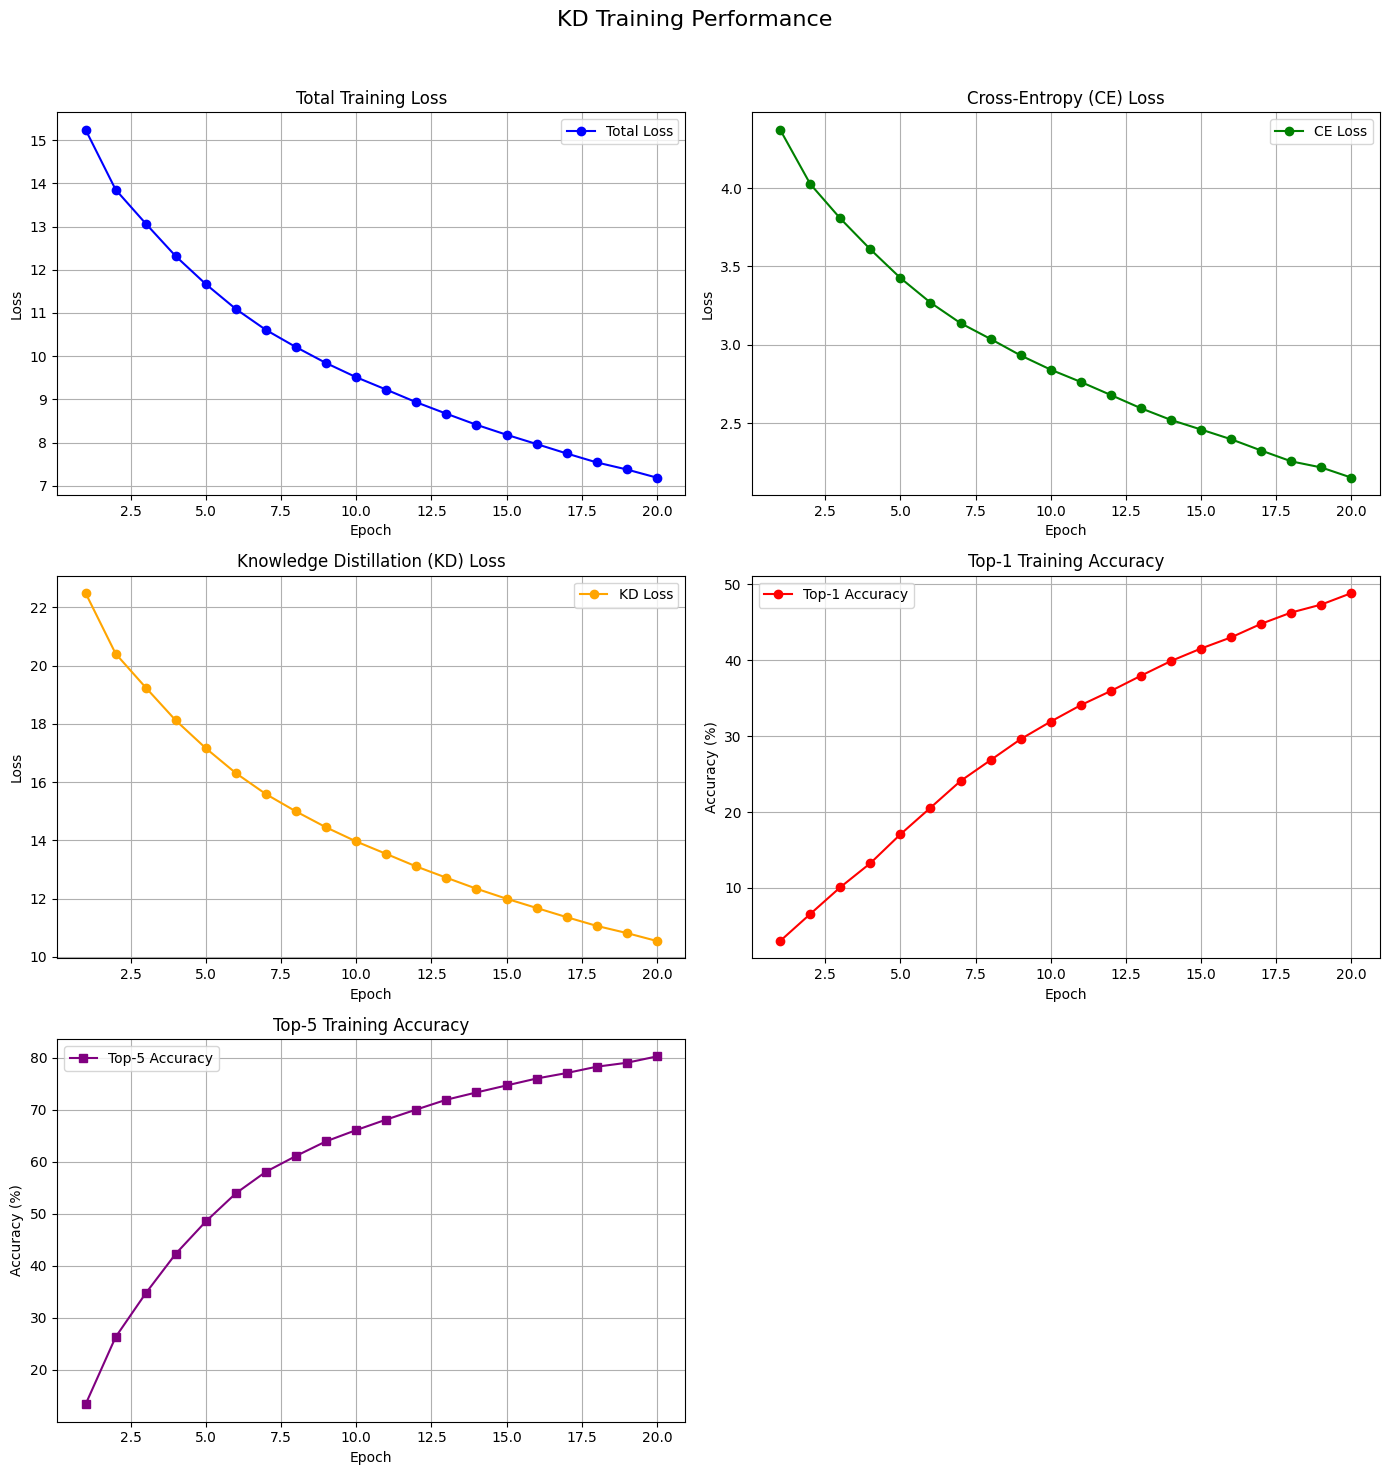

In [3]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 20
epoch_range = range(1, epochs + 1)

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('KD Training Performance', fontsize=16)

axes = axes.flatten()

# --- Plot 1: Total Loss ---
axes[0].plot(epoch_range, epoch_losses, label='Total Loss', color='blue', marker='o')
axes[0].set_title('Total Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(True)
axes[0].legend()

# --- Plot 2: Cross-Entropy (CE) Loss ---
axes[1].plot(epoch_range, epoch_ce, label='CE Loss', color='green', marker='o')
axes[1].set_title('Cross-Entropy (CE) Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].grid(True)
axes[1].legend()

# --- Plot 3: Knowledge Distillation (KD) Loss ---
axes[2].plot(epoch_range, epoch_kd, label='KD Loss', color='orange', marker='o')
axes[2].set_title('Knowledge Distillation (KD) Loss')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].grid(True)
axes[2].legend()

axes[3].plot(epoch_range, epoch_top1, label='Top-1 Accuracy', color='red', marker='o')
axes[3].set_title('Top-1 Training Accuracy')
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('Accuracy (%)')
axes[3].grid(True)
axes[3].legend()

axes[4].plot(epoch_range, epoch_top5, label='Top-5 Accuracy', color='purple', marker='s')
axes[4].set_title('Top-5 Training Accuracy')
axes[4].set_xlabel('Epoch')
axes[4].set_ylabel('Accuracy (%)')
axes[4].grid(True)
axes[4].legend()

fig.delaxes(axes[5])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()